In [25]:
import os
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [3]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/train",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 791 files belonging to 2 classes.


2024-04-16 01:21:43.968581: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-16 01:21:43.968621: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-04-16 01:21:43.968632: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-04-16 01:21:43.968692: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-16 01:21:43.968936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
## loading validation dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/val",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 98 files belonging to 2 classes.


In [5]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/test",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 100 files belonging to 2 classes.


In [6]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential(
    [
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dense(len(class_names), activation="softmax"),
    ]
)

MyCnn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [7]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10


2024-04-16 01:21:52.238643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-16 01:21:52.260451: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


8/8 [==============================] - 8s 619ms/step - loss: 8.5144 - accuracy: 0.4728 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 4s 499ms/step - loss: 0.6863 - accuracy: 0.5942 - val_loss: 0.6936 - val_accuracy: 0.5306
Epoch 3/10
8/8 [==============================] - 4s 463ms/step - loss: 0.6699 - accuracy: 0.6081 - val_loss: 0.6821 - val_accuracy: 0.6020
Epoch 4/10
8/8 [==============================] - 4s 509ms/step - loss: 0.6107 - accuracy: 0.6738 - val_loss: 0.6585 - val_accuracy: 0.6224
Epoch 5/10
8/8 [==============================] - 4s 499ms/step - loss: 0.5647 - accuracy: 0.7016 - val_loss: 0.6206 - val_accuracy: 0.6429
Epoch 6/10
8/8 [==============================] - 4s 457ms/step - loss: 0.5219 - accuracy: 0.7396 - val_loss: 0.5664 - val_accuracy: 0.6633
Epoch 7/10
8/8 [==============================] - 3s 374ms/step - loss: 0.4513 - accuracy: 0.7965 - val_loss: 0.5763 - val_accuracy: 0.7041
Epoch 8/10
8/8 [===============

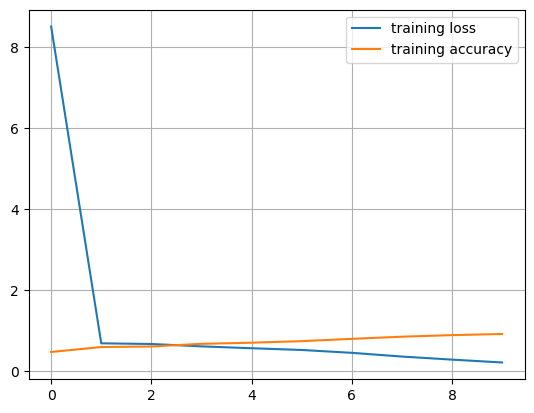

In [8]:
## stats on training data
plt.plot(retVal.history["loss"], label="training loss")
plt.plot(retVal.history["accuracy"], label="training accuracy")
plt.grid(True)
plt.legend()

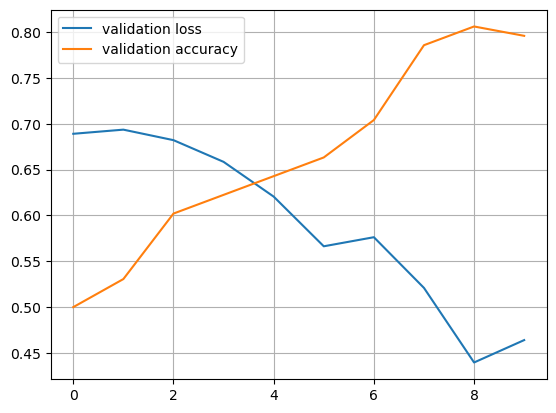

In [9]:
## stats on validation data
plt.plot(retVal.history["val_loss"], label="validation loss")
plt.plot(retVal.history["val_accuracy"], label="validation accuracy")
plt.grid(True)
plt.legend()

1/4 [======>.......................] - ETA: 0s

2024-04-16 01:23:25.398563: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


4/4 [==============================] - 0s 87ms/step


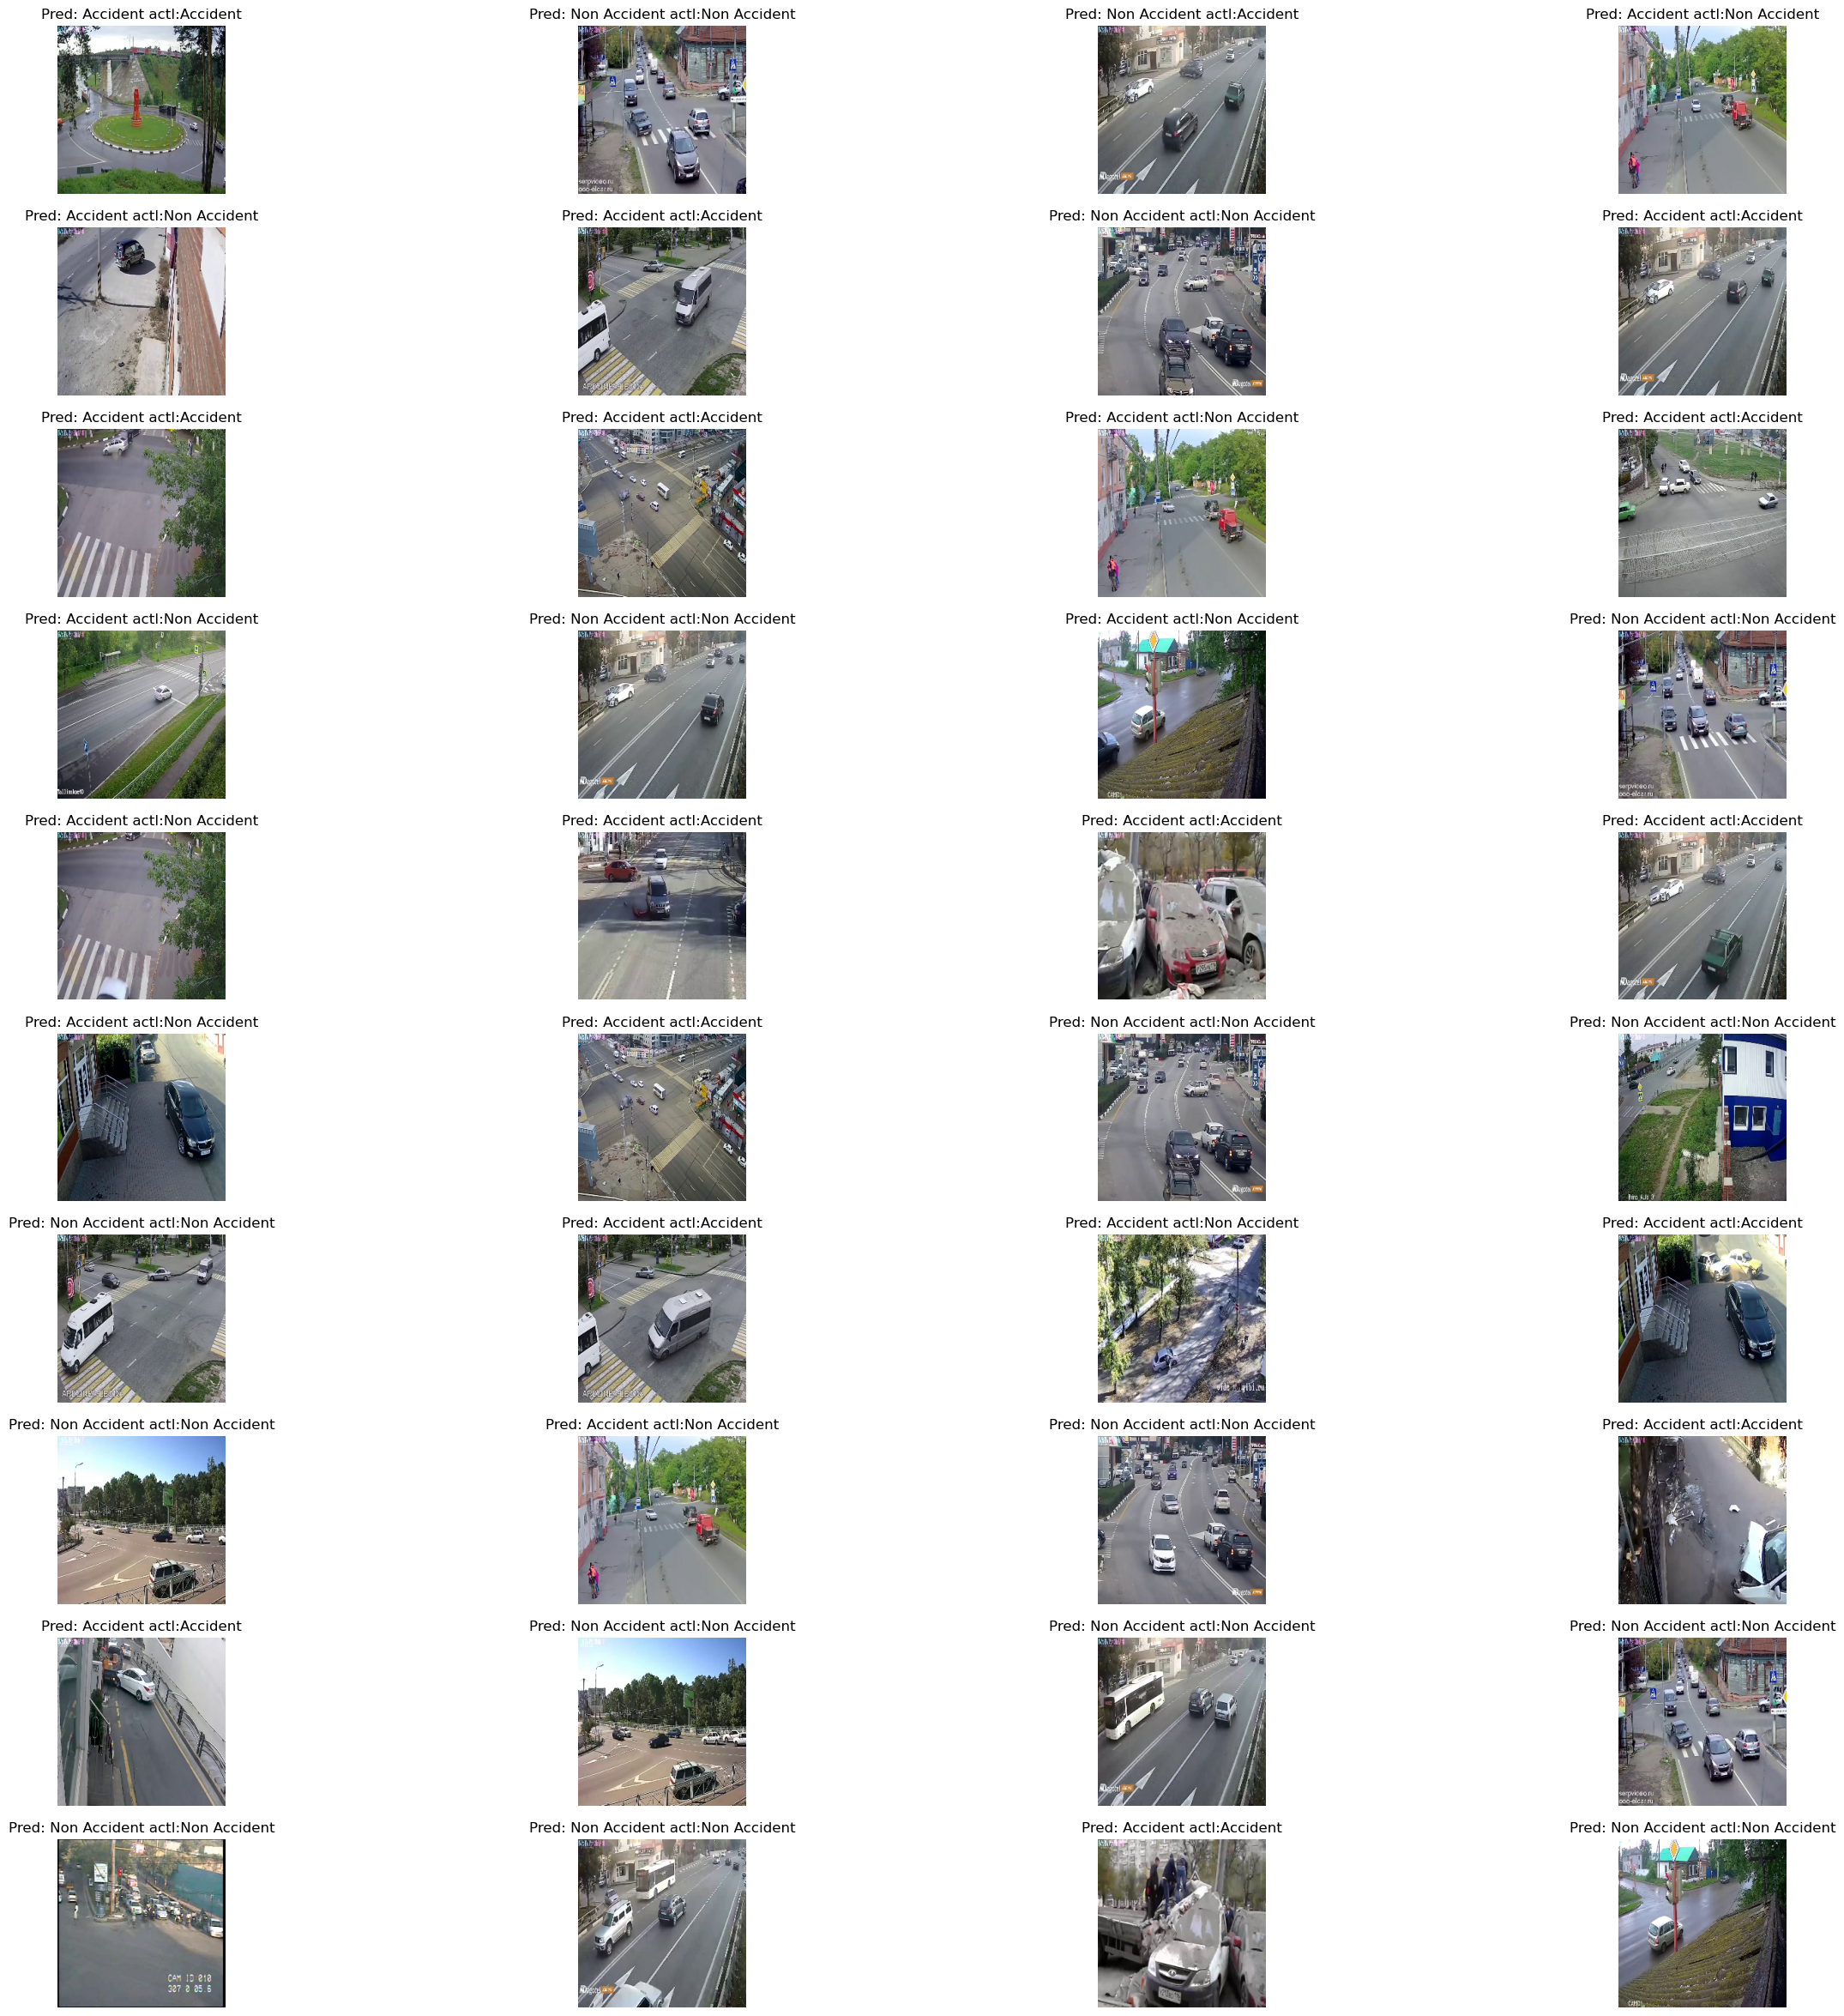

In [10]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Pred: " + predlabel[i] + " actl:" + class_names[labels[i]])
        plt.axis("off")
        plt.grid(True)

In [11]:
MyCnn.save("Model.h5")

/Users/rudra/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
accuracy = np.mean(AccuracyVector)
print("Test accuracy:", accuracy)

Test accuracy: 0.74
